# Boston House Price Prediction with Linear regression

In [0]:
# Import Boston Data from sklearn
from sklearn.datasets import load_boston

#Assign Dataset to Variable
boston = load_boston()



In [2]:
# Verify that the data imported
# Shape tells you ho many rows and columns are in your data
print(boston.data.shape)

(506, 13)


In [3]:
# take a quick peak at what our boston Data looks like
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
# import pandas | Note that usually when writing code you will keep your imports at the top
# For this workshop I'm importing them when we use them to make it more clear what we're using them for
import pandas as pd 

In [0]:
# We won't go too deep into Pandas or visualizing our data
# but lets take a quick look at it in a dataframe
# Create a DataFrome from Pandas | Excel looking table
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
#print out the DataFrame for easier to read data
df

## Print just the last 5 rows 
# df.tail()

## prints the first 5 rows
# df.head()

## Change settings to display all of our rows. 
# pd.options.display.max_rows = 200

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [16]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
x = boston.data
y = boston.target

In [0]:
from sklearn import linear_model


In [0]:
reg = linear_model.LinearRegression()

In [19]:
reg.fit(x, y)

test_house = [0.80271, 0.0, 8.14, 0.0, 0.538, 5.456, 36.6, 3.7965, 4.0, 307.0 ,21.0, 288.99, 11.69]

result = reg.predict([test_house])

print(result)

[16.17801106]


Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.1,
                                                    random_state=4)

In [0]:
reg = linear_model.LinearRegression()

In [144]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = reg.predict(x_test)

In [146]:
print("Test Predictions: \n {}".format(y_pred))

Test Predictions: 
 [11.46030778 26.80269335 17.43478925 17.5563101  37.39156424 25.07675556
 31.05825852 20.30845531 19.66757374 22.82655375 28.47083056 28.53331605
 18.72883256 33.11375161 21.34282974 15.20554693 21.57309275 10.92841589
 11.69603405 13.54311508  5.07126801 17.40464043 20.69379268 22.72981238
 16.4634139  20.42666271 17.53377349 14.22644356 21.56292745 17.33136115
 14.28888479 23.92829804 34.31523522 22.03799035 17.47895779 20.20386005
 30.70896335 35.21599528 24.07063567 24.51445184 36.77425366 33.15265201
 19.67545976 31.93505104 33.55222906 25.59147737 40.59239607 17.99555017
 19.92780188 23.65319423 33.48950986]


In [147]:
# Print accuracy
reg.score(x_test, y_test)

0.7926083526613206

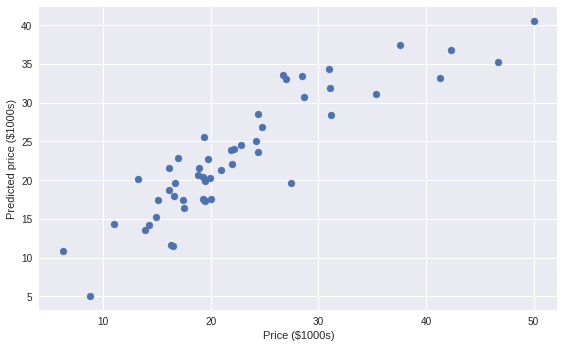

In [149]:
import matplotlib.pyplot as plt

predicted = reg.predict(x_test)

expected = y_test

plt.figure(figsize=(8, 5))
plt.scatter(expected, predicted)
plt.xlabel('Price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

Back to Github repo: https://github.com/sagecodes/intro-machine-learning